In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn import datasets

In [44]:
# Load the diabetes dataset
diabetes_dataset = datasets.load_diabetes()

In [45]:
# Print the shape of the entire data matrix
print('The full data matrix has shape', diabetes_dataset.data.shape)

The full data matrix has shape (442, 10)


In [46]:
# Select only one feature for simplicity
features = diabetes_dataset.data[:, np.newaxis, 2]
print('Selected feature:', features.shape)
print('Selected feature name:', diabetes_dataset.feature_names[2])

Selected feature: (442, 1)
Selected feature name: bmi


In [47]:
# Initialize an array to store the performance metrics
# Columns: [0] training data size, [1] mean squared error, [2] variance score
performance_metrics = np.zeros((412, 3))

このコードの部分は、モデルの性能指標を保存するための配列を初期化しています。具体的には、`np.zeros((412, 3))` という命令は、すべての要素が0の、412行3列の配列を作成します。この配列は、後でループを通じて得られる性能指標を格納するために使用されます。

配列の各列は次のように割り当てられています：

- 列[0]：トレーニングデータのサイズ（トレーニングに使用されるデータポイントの数）。
- 列[1]：平均二乗誤差（Mean Squared Error, MSE）の値。これはモデルの予測がどの程度正確かを示す指標で、値が小さいほど良いとされます。
- 列[2]：決定係数（Variance Score, \( R^2 \) スコア）。これはモデルがデータの変動をどれだけ説明できているかを示す指標で、値が1に近いほど良いとされます。

ループ内で、各イテレーションにおいてモデルが訓練され、テストデータに対して評価された後、これらの性能指標が `performance_metrics` 配列に記録されます。これにより、トレーニングデータのサイズを変えたときにモデルの性能がどのように変化するかを後で分析することができます。

In [48]:
# Loop over different training data sizes
for i in range(441, 29, -1):
    print('============== TRAINING DATA SIZE: ', 442 - i, ' ===============')
    
    # Split the data
    train_features = features[:-i]
    test_features = features[-30:]
    train_targets = diabetes_dataset.target[:-i]
    test_targets = diabetes_dataset.target[-30:]
    
    # Explore the data
    print('Feature names:', diabetes_dataset.feature_names)
    print('Target shape:', diabetes_dataset.target.shape)
    print('Training features shape', train_features.shape)
    print('Test features shape', test_features.shape)
    print('Training targets shape', train_targets.shape)
    print('Test targets shape', test_targets.shape)
    
    # Initialize and fit the linear regression model
    from sklearn import linear_model
    linear_regression_model = linear_model.LinearRegression()
    linear_regression_model.fit(train_features, train_targets)
    print('Coefficients:', linear_regression_model.coef_)
    print('Intercept:', linear_regression_model.intercept_)
    
    # Make predictions on the test data
    predicted_targets = linear_regression_model.predict(test_features)
    
    # Evaluate the model performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(test_targets, predicted_targets)
    variance = r2_score(test_targets, predicted_targets)
    print("Mean squared error: %.2f" % mse)
    print('Variance score: %.2f' % variance)
    
    # Store the training sample size, MSE, and variance score
    performance_metrics[442 - i - 1] = [442 - i, mse, variance]
    
    print('')

============== TRAINING DATA SIZE:  1  ===============
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target shape: (442,)
Training features shape (1, 1)
Test features shape (30, 1)
Training targets shape (1,)
Test targets shape (30,)
Coefficients: [0.]
Intercept: 151.0
Mean squared error: 5465.50
Variance score: -0.06

============== TRAINING DATA SIZE:  2  ===============
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target shape: (442,)
Training features shape (2, 1)
Test features shape (30, 1)
Training targets shape (2,)
Test targets shape (30,)
Coefficients: [671.55447721]
Intercept: 109.56763628528348
Mean squared error: 3596.79
Variance score: 0.30

============== TRAINING DATA SIZE:  3  ===============
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target shape: (442,)
Training features shape (3, 1)
Test features shape (30, 1)
Training targets shape (3,)
Test targets shape (30,)
Coe

この `for` ループは、糖尿病データセットにおける異なるサイズの訓練データを使って線形回帰モデルの性能を評価するために使われています。

```python
for i in range(441, 29, -1):
```

この行は `range` 関数を使用しています。`range` 関数は3つの引数を取ります: 開始値、終了値、およびステップサイズです。この場合:

- `441` はループの開始値で、`i` の初期値です。
- `29` はループが停止する値で、`i` がこの値に到達したときにループは停止します（この値は含まれません）。
- `-1` は各イテレーションで `i` から引かれる値、つまりステップサイズです。

このループは、`i` が `441` から開始して、各イテレーションで `1` ずつ減少し、`30` になるまで続きます（`29` は含まれないため）。それぞれのイテレーションで、トレーニングセットから異なる数のデータポイントを使用してモデルを訓練し、固定されたサイズのテストセット（最後の30個のデータポイント）でモデルの性能を評価します。

つまり、このコードはトレーニングデータセットのサイズを徐々に減らしながらモデルを訓練し、それぞれのサイズに対するモデルの性能（平均二乗誤差と決定係数）を計済み、記録しています。これにより、トレーニングデータの量がモデルの性能にどのように影響するかを観察することができます。

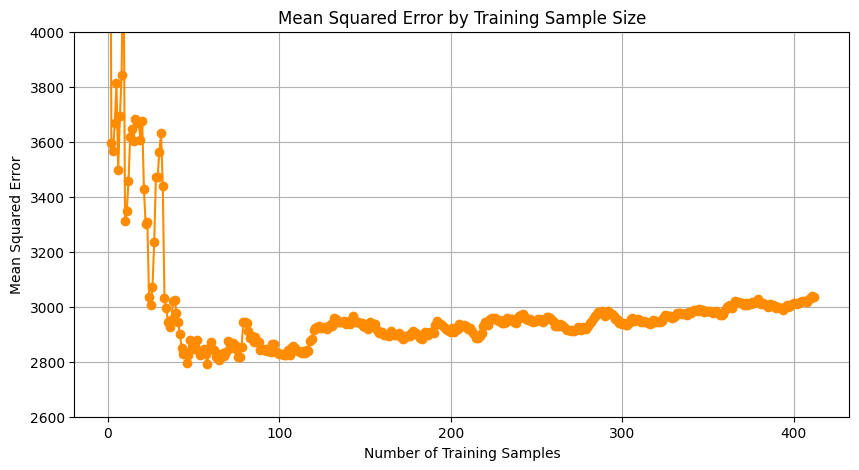

In [49]:
# Plot Mean Squared Error vs. Training Samples
plt.figure(figsize=(10, 5))
plt.plot(performance_metrics[:, 0], performance_metrics[:, 1], color='darkorange', marker='o', linestyle='-')
plt.title('Mean Squared Error by Training Sample Size')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.ylim((2600, 4000))  # Set the y-axis limits to make trends more visible
plt.grid(True)
plt.savefig('picture/ans_1.1.png')
plt.show()

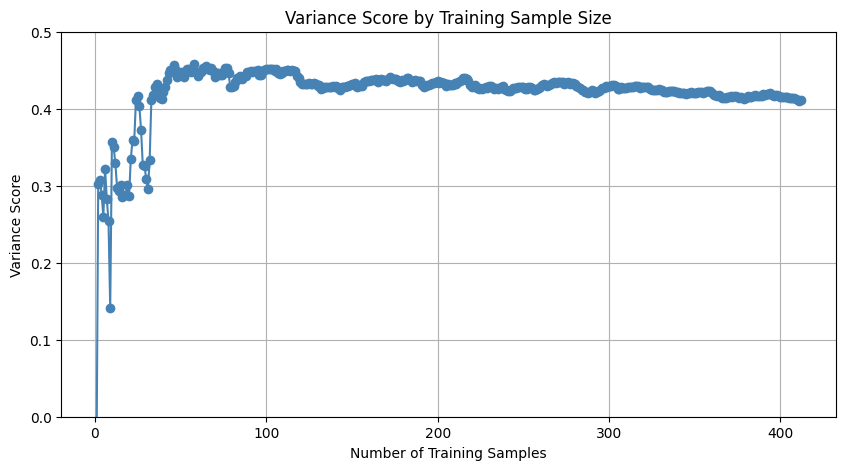

In [50]:
# Plot Variance Score vs. Training Samples
plt.figure(figsize=(10, 5))
plt.plot(performance_metrics[:, 0], performance_metrics[:, 2], color='steelblue', marker='o', linestyle='-')
plt.title('Variance Score by Training Sample Size')
plt.xlabel('Number of Training Samples')
plt.ylabel('Variance Score')
plt.ylim((0, 0.5))  # Set the y-axis limits to make trends more visible
plt.grid(True)
plt.savefig('picture/ans_1.2.png')
plt.show()

### plt.show()
`plt.show()` 関数は、Matplotlibで作成した図を表示するために使用されます。スクリプトやプログラムの最後に `plt.show()` を配置すると、すべてのプロットが表示され、ユーザーがそれらを閲覧できる状態になります。対話型環境やJupyterノートブックのようにプロットが自動的に表示される環境では、この関数が不要な場合がありますが、それでも以下のような違いがあります：

- **`plt.show()` がある場合**：
  - プログラムは `plt.show()` で実行を停止し、ユーザーが生成されたウィンドウを閉じるまで待機します。
  - すべての開いているフィギュアが表示され、フィギュアに対する対話が可能になります（ズーム、パン、保存など）。
  - 一度 `plt.show()` を実行すると、表示されたフィギュアに対する後続の変更は反映されません。新しいフィギュアを作成するためには、再度プロット関数を呼び出す必要があります。

- **`plt.show()` がない場合**：
  - スクリプトやプログラムは自動的に次の行に進みます。
  - Jupyterノートブックなどの環境では、セルを実行するたびにフィギュアが自動的に表示されますが、`plt.show()` がないとフィギュアが閉じられたときにPythonの対話セッションが継続することを保証するものではありません。
  - スクリプトが完了した後、開いているすべてのフィギュアが閉じられます。

したがって、対話型環境では `plt.show()` は省略できることが多いですが、スクリプトをファイルとして実行する場合や、ユーザーがフィギュアと対話できるようにしたい場合は、`plt.show()` を使用することが一般的です。